# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [492]:
df = pd.read_csv('bank_transactions_data.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [493]:
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Jumlah baris: 2512
Jumlah kolom: 16


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [495]:
missing_values = df.isnull().sum()
missing_values

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [496]:
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'] ,axis=1)

In [497]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [498]:
df[numeric_columns].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


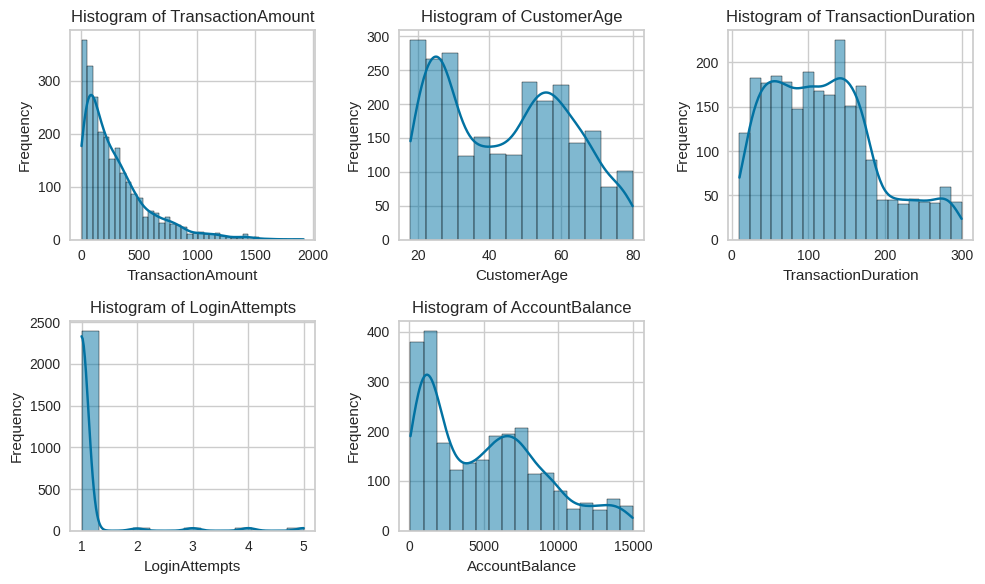

In [499]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

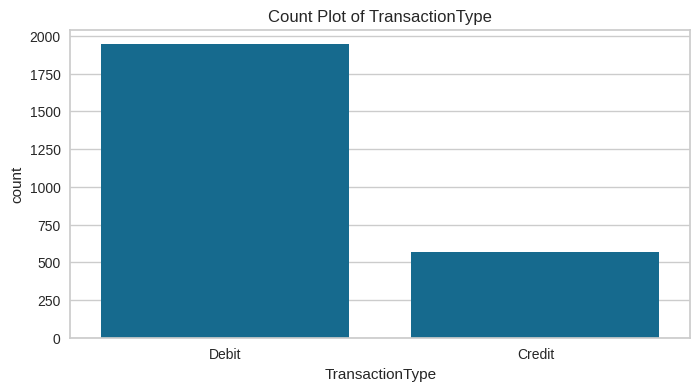

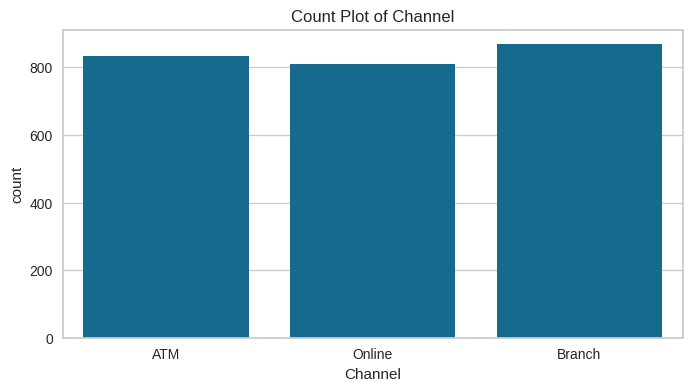

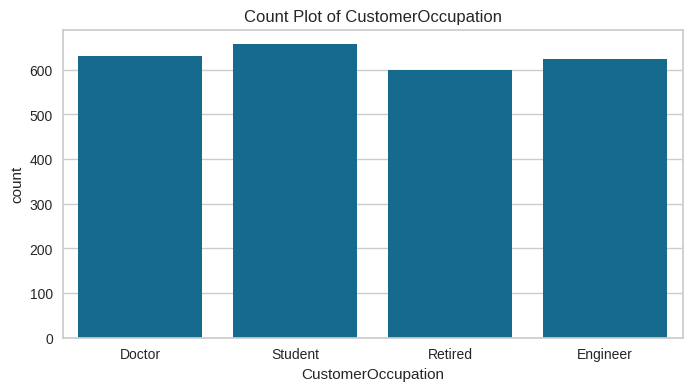

In [500]:
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)

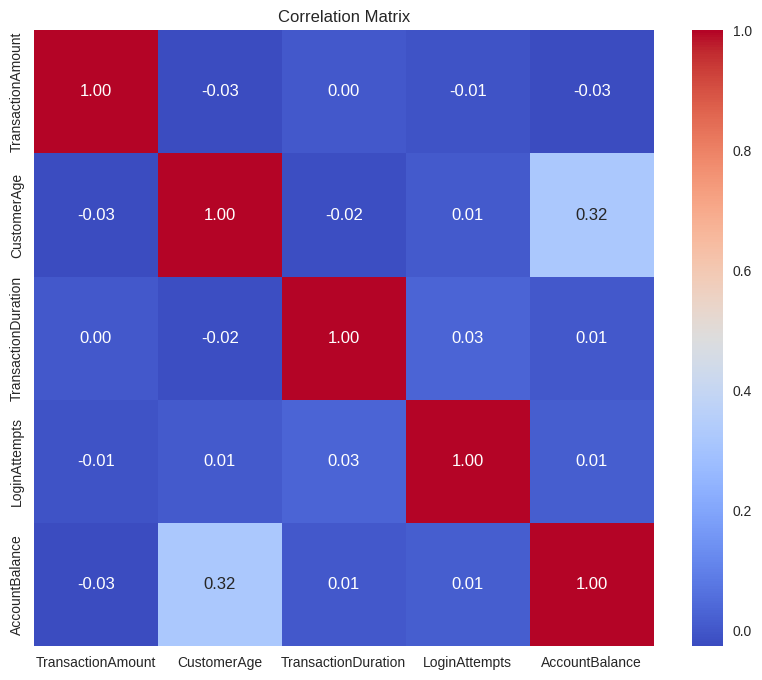

In [501]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [502]:
missing_values = df.isnull().sum()
missing_values

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [503]:
print(f'Jumlah baris duplikat: {df.duplicated().sum()}')

Jumlah baris duplikat: 0


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 176.8+ KB


In [505]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,0.129032,Student,0.648276,0.0,0.492591
...,...,...,...,...,...,...,...,...,...
2507,0.446074,Credit,Colorado Springs,Branch,0.241935,Doctor,0.341379,0.0,0.846257
2508,0.130953,Debit,Tucson,Branch,0.483871,Doctor,0.575862,0.0,0.010318
2509,0.014785,Debit,San Diego,Branch,0.612903,Retired,0.468966,0.0,0.220590
2510,0.096782,Debit,Denver,Online,0.080645,Student,0.031034,0.0,0.112636


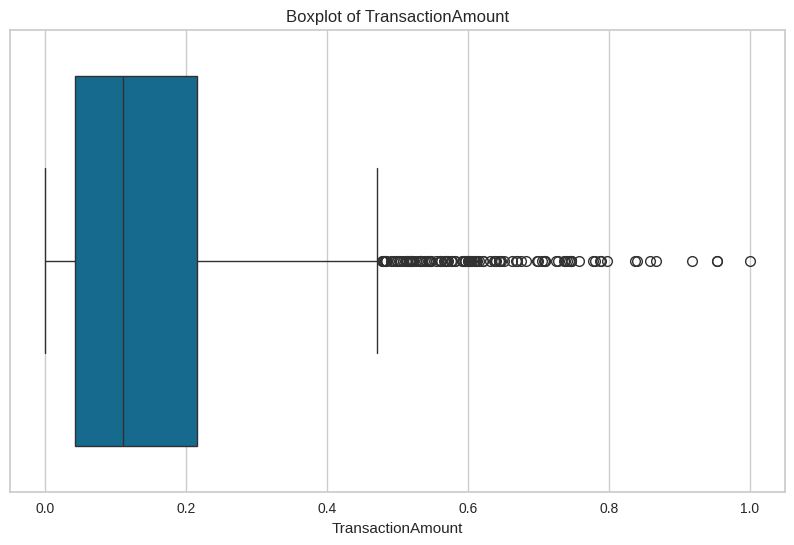

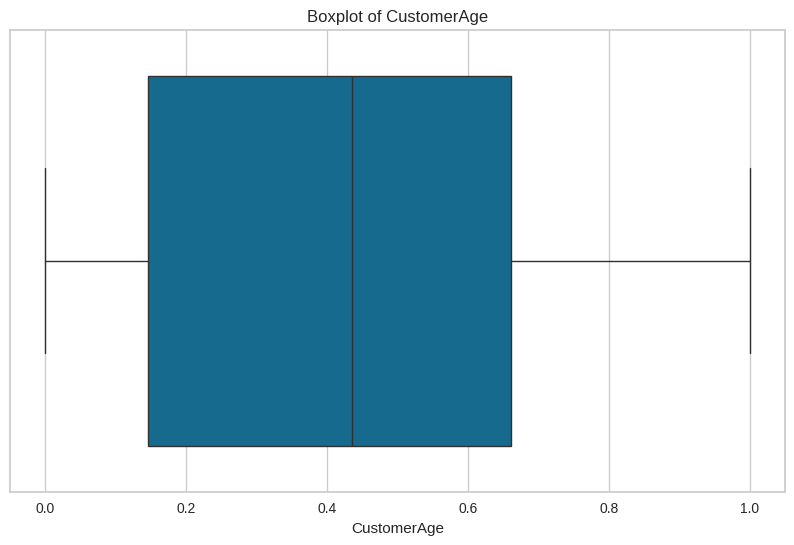

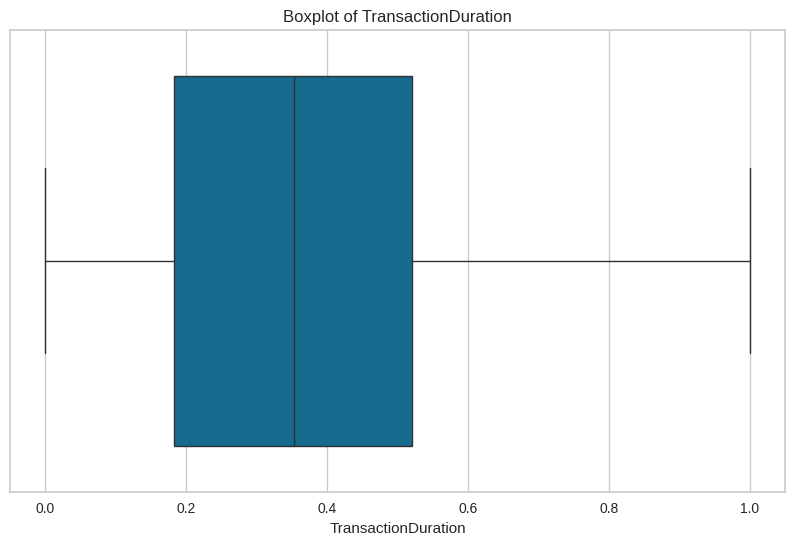

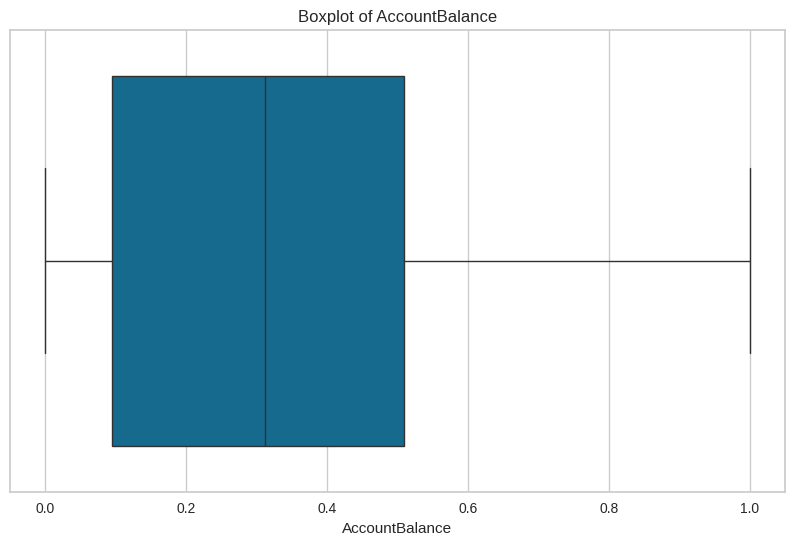

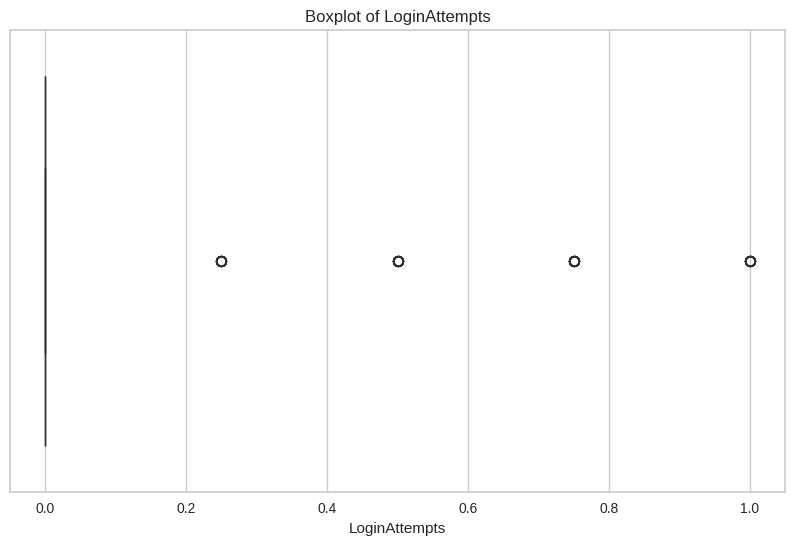

In [506]:
selection = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']

for feature in selection:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [507]:
df['TransactionAmount'] = winsorize(df['TransactionAmount'], limits=[0.05, 0.05])
df['CustomerAge'] = winsorize(df['CustomerAge'], limits=[0.05, 0.05])
df['TransactionDuration'] = winsorize(df['TransactionDuration'], limits=[0.05, 0.05])
df['AccountBalance'] = winsorize(df['AccountBalance'], limits=[0.05, 0.05])
df['LoginAttempts'] = winsorize(df['LoginAttempts'], limits=[0.05, 0.05])

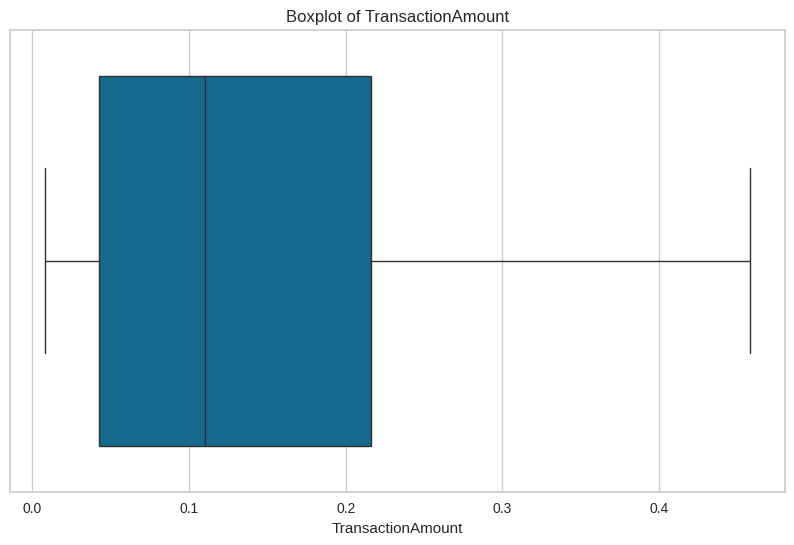

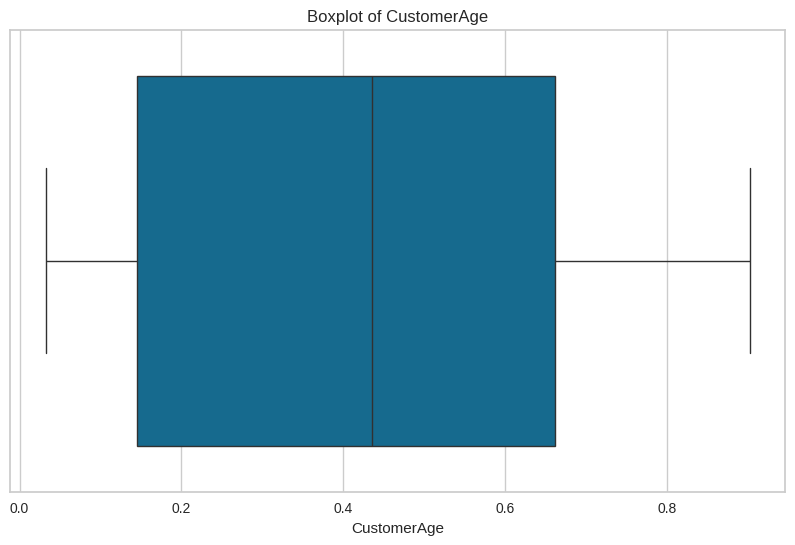

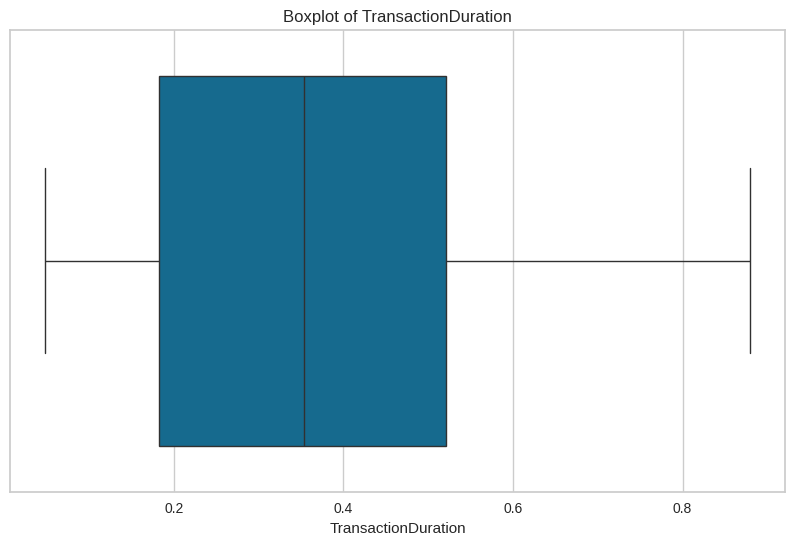

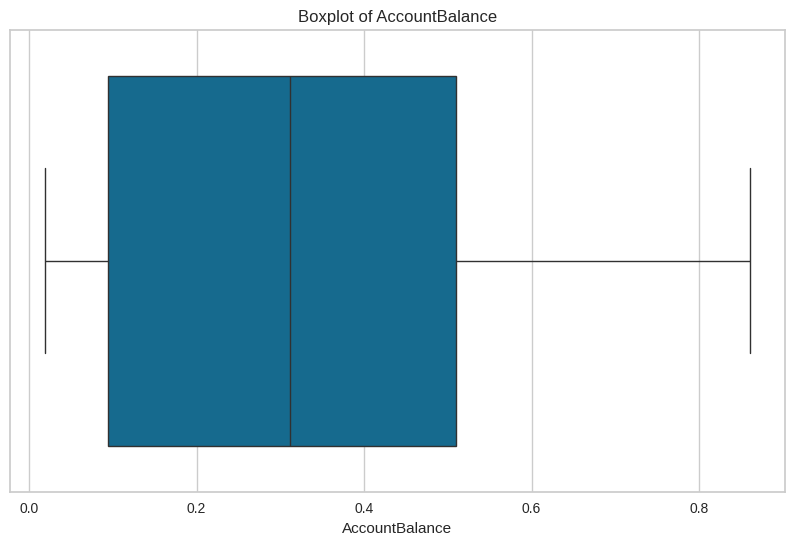

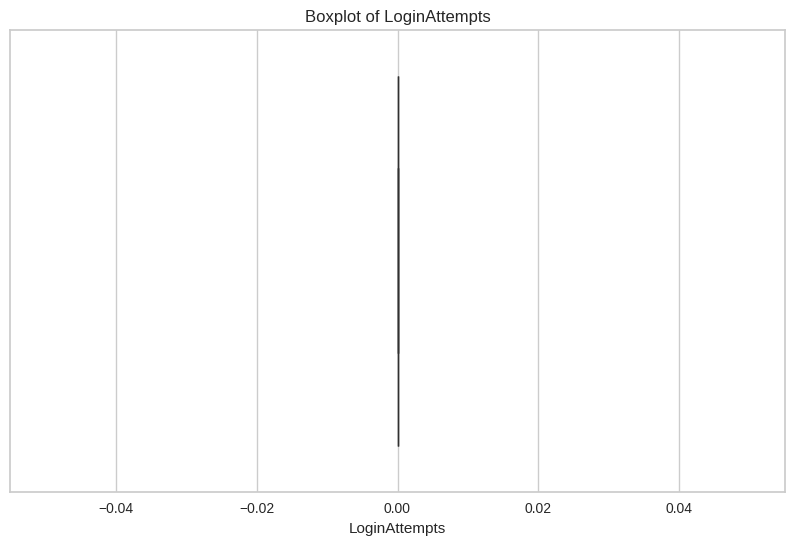

In [508]:
for feature in selection:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   float64
 7   LoginAttempts        2512 non-null   float64
 8   AccountBalance       2512 non-null   float64
dtypes: float64(5), object(4)
memory usage: 176.8+ KB


In [510]:
# Daftar kolom kategori
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Dictionary untuk menyimpan encoder
label_encoders = {}

# Encoding setiap kolom dan menyimpan LabelEncoder
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Menampilkan hasil encoding
df.head()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.008286,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.860633
2,0.065680,1,23,2,0.032258,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.008286,0,1,2,0.129032,3,0.648276,0.0,0.492591


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [511]:
cluster_features = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge', 'AccountBalance']
X = df[cluster_features]

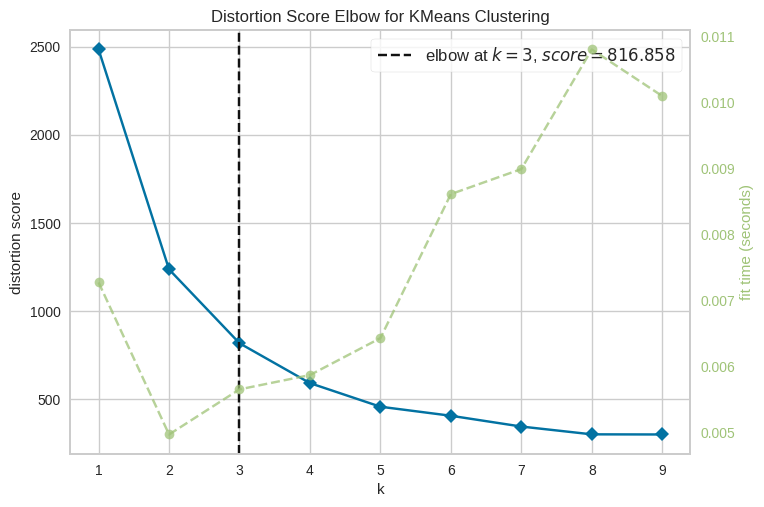

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [512]:
# K elbow for n of clusters
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [513]:
kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans = kmeans.fit(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [514]:
sil_score = []
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict(X)
    score = silhouette_score(X, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score = {}".format(n_clusters, score))

For n_clusters = 2, silhouette score = 0.42122757219907847
For n_clusters = 3, silhouette score = 0.4343772786751517
For n_clusters = 4, silhouette score = 0.4746527537672234
For n_clusters = 5, silhouette score = 0.4284464476644075
For n_clusters = 6, silhouette score = 0.47703374138678933
For n_clusters = 7, silhouette score = 0.43808587330431176
For n_clusters = 8, silhouette score = 0.46433626650031085
For n_clusters = 9, silhouette score = 0.4529161496802119


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [515]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

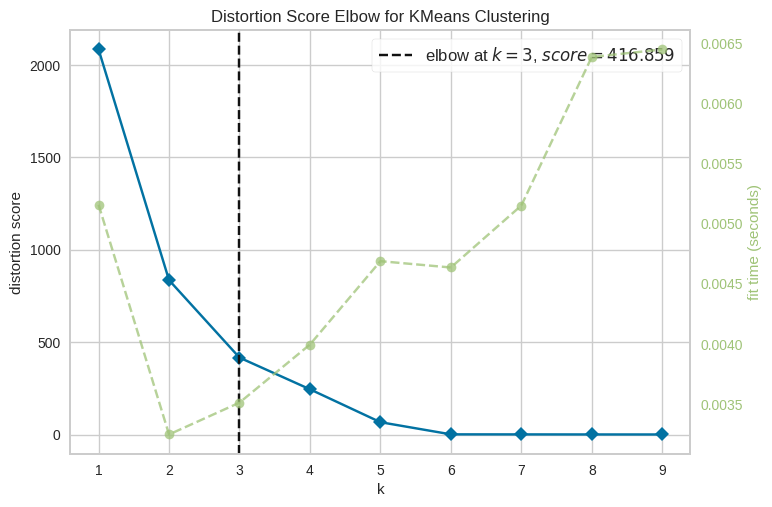

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [516]:
# K elbow for n of clusters
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_pca)
visualizer.show()

In [517]:
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict(X_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_pca, preds)
    print("For n_clusters = {}, silhouette score = {}".format(n_clusters, score))

For n_clusters = 2, silhouette score = 0.5813906828679993
For n_clusters = 3, silhouette score = 0.701552314940375
For n_clusters = 4, silhouette score = 0.8317127734987478
For n_clusters = 5, silhouette score = 0.9268034860434576
For n_clusters = 6, silhouette score = 0.9707414988578527
For n_clusters = 7, silhouette score = 0.8730823532024505
For n_clusters = 8, silhouette score = 0.7874175928962048
For n_clusters = 9, silhouette score = 0.7090521284997895


In [518]:
kmeans = KMeans(n_clusters=4, random_state=0)
model_kmeans = kmeans.fit(X_pca)
labels = model_kmeans.labels_
df['Cluster'] = labels
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0.008286,1,36,0,0.838710,0,0.244828,0.0,0.336832,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.860633,1
2,0.065680,1,23,2,0.032258,3,0.158621,0.0,0.068637,3
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,3
4,0.008286,0,1,2,0.129032,3,0.648276,0.0,0.492591,0
...,...,...,...,...,...,...,...,...,...,...
2507,0.446074,0,7,1,0.241935,0,0.341379,0.0,0.846257,0
2508,0.130953,1,40,1,0.483871,0,0.575862,0.0,0.019252,2
2509,0.014785,1,36,1,0.612903,2,0.468966,0.0,0.220590,2
2510,0.096782,1,10,2,0.080645,3,0.048276,0.0,0.112636,3


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

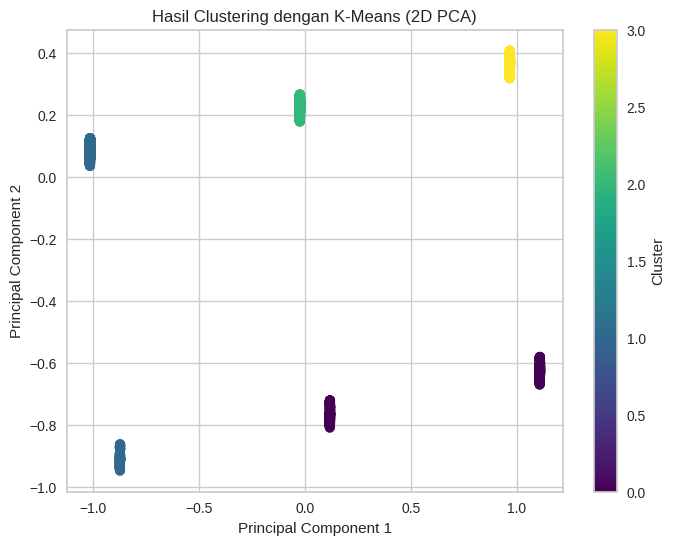

In [519]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Hasil Clustering dengan K-Means (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [520]:
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])

In [521]:
for column in categorical_columns:
    df[column] = label_encoders[column].inverse_transform(df[column])

# Menampilkan hasil setelah inverse transform
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,16.16,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,12904.66,1
2,126.29,Debit,Mesa,Online,20.0,Student,56.0,1.0,1122.35,3
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,3
4,16.16,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [522]:
cluster_analysis_num = df.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max']
}).round(2)

print("Karakteristik Cluster pada fitur numerik")
cluster_analysis_num

Karakteristik Cluster pada fitur numerik


TransactionAmount                CustomerAge              \
                     mean    min     max        mean   min   max   
Cluster                                                            
0                  292.58  16.16  878.63       46.38  20.0  74.0   
1                  290.87  16.16  878.63       44.88  20.0  74.0   
2                  264.78  16.16  878.63       43.81  20.0  74.0   
3                  285.64  16.16  878.63       43.37  20.0  74.0   

        TransactionDuration              AccountBalance                    \
                       mean   min    max           mean     min       max   
Cluster                                                                     
0                    118.26  24.0  265.0        5311.86  387.65  12904.66   
1                    121.73  24.0  265.0        4984.99  387.65  12904.66   
2                    116.41  24.0  265.0        5232.19  387.65  12904.66   
3                    119.16  24.0  265.0        4806.69  387.65  12904.66   

        LoginAttempts            
                 mean  min  max  
Cluster                          
0                 1.0  1.0  1.0  
1                 1.0  1.0  1.0  
2                 1.0  1.0  1.0  
3                 1.0  1.0  1.0

In [523]:
cluster_analysis_cat = df.groupby('Cluster').agg({
    'TransactionType': lambda x: x.mode()[0],
    'Location': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'CustomerOccupation': lambda x: x.mode()[0]
})

print("Spesifikasi Cluster pada fitur kategorikal")
cluster_analysis_cat

Spesifikasi Cluster pada fitur kategorikal


,TransactionType,Location,Channel,CustomerOccupation
Cluster,,,,
0,Credit,Austin,Branch,Retired
1,Debit,Fort Worth,ATM,Student
2,Debit,Tucson,Branch,Doctor
3,Debit,Charlotte,Online,Student


In [524]:
for cluster, data in df.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data.describe())
    print("\n")

Cluster 0:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         495.000000   495.000000           495.000000          495.0   
mean          292.578121    46.379798           118.264646            1.0   
std           252.277107    17.420879            64.910283            0.0   
min            16.160000    20.000000            24.000000            1.0   
25%            79.235000    28.000000            64.000000            1.0   
50%           220.680000    49.000000           109.000000            1.0   
75%           425.180000    60.000000           159.500000            1.0   
max           878.630000    74.000000           265.000000            1.0   

       AccountBalance  Cluster  
count      495.000000    495.0  
mean      5311.864808      0.0  
std       3884.181793      0.0  
min        387.650000      0.0  
25%       1684.470000      0.0  
50%       4972.920000      0.0  
75%       7945.920000      0.0  
max      12904.660000      0.0 

**Analisis Karakteristik Cluster dari Model KMeans**
### **Cluster 0:**  
- **Rata-rata Transaction Amount:** 292.58  
- **Rata-rata Customer Age:** 46.38 tahun  
- **Rata-rata Transaction Duration:** 118.26 detik  
- **Rata-rata Account Balance:** $5311.86  

**Analisis:**  
Cluster ini mencakup pelanggan dengan jumlah transaksi yang sedang serta usia rata-rata di atas 45 tahun. Mereka memiliki saldo akun yang cukup besar, menunjukkan bahwa pelanggan dalam cluster ini mungkin merupakan individu yang memiliki kestabilan finansial dan cenderung melakukan transaksi dalam jumlah yang cukup signifikan.

---

### **Cluster 1:**  
- **Rata-rata Transaction Amount:** 290.87  
- **Rata-rata Customer Age:** 44.88 tahun  
- **Rata-rata Transaction Duration:** 121.73 detik  
- **Rata-rata Account Balance:** $4984.99  

**Analisis:**  
Pelanggan dalam cluster ini memiliki karakteristik yang hampir mirip dengan Cluster 0, dengan sedikit lebih tinggi dalam durasi transaksi dan usia rata-rata yang sedikit lebih muda. Ini bisa menunjukkan kelompok pelanggan yang cukup aktif dalam bertransaksi dengan saldo rekening yang relatif stabil.

---

### **Cluster 2:**  
- **Rata-rata Transaction Amount:** 264.78  
- **Rata-rata Customer Age:** 43.81 tahun  
- **Rata-rata Transaction Duration:** 116.41 detik  
- **Rata-rata Account Balance:** $5232.18  

**Analisis:**  
Cluster ini berisi pelanggan dengan jumlah transaksi yang lebih rendah dibandingkan Cluster 0 dan 1, serta memiliki usia rata-rata yang sedikit lebih muda. Mereka mungkin memiliki perilaku transaksi yang lebih hemat atau cenderung melakukan transaksi dalam jumlah lebih kecil namun tetap memiliki saldo rekening yang cukup tinggi.

---

### **Cluster 3:**  
- **Rata-rata Transaction Amount:** 285.64  
- **Rata-rata Customer Age:** 43.37 tahun  
- **Rata-rata Transaction Duration:** 119.16 detik  
- **Rata-rata Account Balance:** $4806.69  

**Analisis:**  
Pelanggan dalam cluster ini memiliki jumlah transaksi dan durasi transaksi yang mirip dengan cluster lainnya, namun dengan saldo rekening yang sedikit lebih rendah dibandingkan cluster lainnya. Hal ini bisa menunjukkan bahwa mereka lebih cenderung menggunakan saldo rekening mereka untuk berbagai transaksi dengan nominal yang moderat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [525]:
df.to_csv('clustered_data.csv', index=False)